In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import subprocess

from matplotlib import pyplot as plt
import torch.nn.functional as F
import torch

from dataset import SKULLBREAKDatasetTriplet

from filtering.retrieval import RetrievalResnet

## Getting the data

In [3]:
dataset = SKULLBREAKDatasetTriplet('../data/skull-break/train/nrrd/complete_skull', resize_d=4, resize_h=4, resize_w=4)
len(dataset)

114

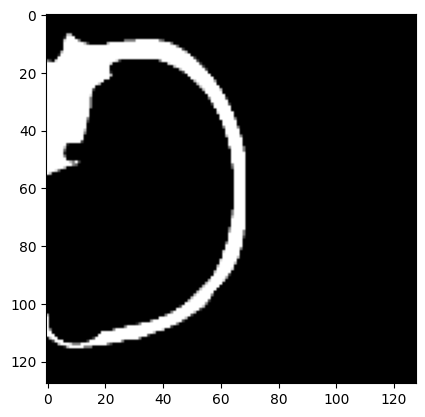

In [4]:
item1 = dataset[0]['data']
item2 = dataset[1]['data']

plt.imshow(item1[0].squeeze(0)[64], cmap='gray')
plt.show()

## RetrievalResnet

In [5]:
# Preparing example batch

batch = {'data': torch.stack((item1, item2), dim=0)}
batch['data'].shape

torch.Size([2, 3, 1, 128, 128, 128])

In [6]:
# Preparing model configurations
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

config = AttrDict()
config.model = AttrDict()
config.model.accelerator = 'cpu'
config.model.resnet_type = 'resnet10'
config.model.pretrain_path = None
config


{'model': {'accelerator': 'cpu',
  'resnet_type': 'resnet10',
  'pretrain_path': None}}

In [7]:
model = RetrievalResnet(config, input_d=dataset.d, input_h=dataset.h, input_w=dataset.w)
loss = model(batch)

In [8]:
loss

tensor(0.8273, grad_fn=<MeanBackward0>)

## RetrievalResnet Training

In [ ]:
with subprocess.Popen(['python', '-m', 'train.train_retrieval', 'dataset=skull-break-retrieval', 'model=retrieval'], cwd='../', stdout=subprocess.PIPE, stderr=subprocess.STDOUT) as process:
    for line in process.stdout:
      print(line.decode('utf8'))